# Part 1 - Basic Exploration of US Data

***

## Project Description

The New York Times (the Times) has aggregated reported COVID-19 data from state and local governments and health departments since 2020 and provides public access through a repository on GitHub. One of the data sets provided by the Times is county-level data for cumulative cases and deaths each day. This will be your primary data set for the first two parts of your analysis. 

County-level COVID data from 2020, 2021, and 2022 has been imported below. Each row of data reports the cumulative number of cases and deaths for a specific county each day. A FIPS code, a standard geographic identifier, is also provided which you will use in Part 2 to construct a map visualization at the county level for a state. 

Additionally, county-level population estimates reported by the US Census Bureau has been imported as well. You will use these estimates to caluclate statistics per 100,000 people. 


## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

#Plotly
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import researchpy as rp

import datetime
from datetime import datetime, timedelta

# import eli5
# from IPython.display import display

#import os
#import zipfile
import scipy.stats
from collections import Counter

import sklearn
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
# from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso, Ridge
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

# from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor, plot_tree
# from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
# from sklearn.naive_bayes import GaussianNB, MultinomialNB

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
#import feature_engine
#from feature_engine import imputation as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser
#from feature_engine.discretisation import ArbitraryDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df1 = pd.read_csv("us-counties-2020.csv",parse_dates=['date'])

In [3]:
df1

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.00,1,0.00
1,2020-01-22,Snohomish,Washington,53061.00,1,0.00
2,2020-01-23,Snohomish,Washington,53061.00,1,0.00
3,2020-01-24,Cook,Illinois,17031.00,1,0.00
4,2020-01-24,Snohomish,Washington,53061.00,1,0.00
...,...,...,...,...,...,...
884732,2020-12-31,Sweetwater,Wyoming,56037.00,2966,16.00
884733,2020-12-31,Teton,Wyoming,56039.00,2138,4.00
884734,2020-12-31,Uinta,Wyoming,56041.00,1558,7.00
884735,2020-12-31,Washakie,Wyoming,56043.00,780,19.00


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884737 entries, 0 to 884736
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    884737 non-null  datetime64[ns]
 1   county  884737 non-null  object        
 2   state   884737 non-null  object        
 3   fips    876471 non-null  float64       
 4   cases   884737 non-null  int64         
 5   deaths  865976 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 40.5+ MB


In [5]:
df1.describe()

,fips,cases,deaths
count,876471.00,884737.00,865976.00
mean,31262.22,1952.32,53.60
std,16295.23,10106.48,451.86
min,1001.00,0.00,0.00
25%,18183.00,36.00,0.00
50%,29215.00,228.00,4.00
75%,46099.00,993.00,21.00
max,78030.00,770915.00,25144.00


In [6]:
df1.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [7]:
df1.state.unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

### Question 1

Your first task is to combine and tidy the 2020, 2021, and 2022 COVID data sets and find the total deaths and cases for each day since March 15, 2020 (2020-03-15). The data sets provided from the NY Times also includes statistics from Puerto Rico, a US territory. You may remove these observations from the data as they will not be needed for your analysis. Once you have tidied the data, find the total COVID-19 cases and deaths since March 15, 2020.

In [8]:
df1["date"] == "2020-03-15"

0         False
1         False
2         False
3         False
4         False
          ...  
884732    False
884733    False
884734    False
884735    False
884736    False
Name: date, Length: 884737, dtype: bool

In [9]:
df2020 = df1[df1["date"] >= "2020-03-15"]

In [10]:
df2020

,date,county,state,fips,cases,deaths
2309,2020-03-15,Baldwin,Alabama,1003.00,1,0.00
2310,2020-03-15,Elmore,Alabama,1051.00,1,0.00
2311,2020-03-15,Jefferson,Alabama,1073.00,13,0.00
2312,2020-03-15,Lee,Alabama,1081.00,1,0.00
2313,2020-03-15,Limestone,Alabama,1083.00,1,0.00
...,...,...,...,...,...,...
884732,2020-12-31,Sweetwater,Wyoming,56037.00,2966,16.00
884733,2020-12-31,Teton,Wyoming,56039.00,2138,4.00
884734,2020-12-31,Uinta,Wyoming,56041.00,1558,7.00
884735,2020-12-31,Washakie,Wyoming,56043.00,780,19.00


In [11]:
df2020.reset_index(inplace=True, drop=True)

In [12]:
df2020

,date,county,state,fips,cases,deaths
0,2020-03-15,Baldwin,Alabama,1003.00,1,0.00
1,2020-03-15,Elmore,Alabama,1051.00,1,0.00
2,2020-03-15,Jefferson,Alabama,1073.00,13,0.00
3,2020-03-15,Lee,Alabama,1081.00,1,0.00
4,2020-03-15,Limestone,Alabama,1083.00,1,0.00
...,...,...,...,...,...,...
882423,2020-12-31,Sweetwater,Wyoming,56037.00,2966,16.00
882424,2020-12-31,Teton,Wyoming,56039.00,2138,4.00
882425,2020-12-31,Uinta,Wyoming,56041.00,1558,7.00
882426,2020-12-31,Washakie,Wyoming,56043.00,780,19.00


In [13]:
max_date = df2020.date.max()
max_date

Timestamp('2020-12-31 00:00:00')

In [14]:
us_total_cases = df2020.groupby("date")["cases"].sum()
us_total_cases

date
2020-03-15        3600
2020-03-16        4507
2020-03-17        5906
2020-03-18        8350
2020-03-19       12393
                ...   
2020-12-27    19174788
2020-12-28    19363798
2020-12-29    19564828
2020-12-30    19793777
2020-12-31    20024801
Name: cases, Length: 292, dtype: int64

In [15]:
us_total_deaths = df2020.groupby("date")["deaths"].sum()
us_total_deaths

date
2020-03-15       68.00
2020-03-16       91.00
2020-03-17      117.00
2020-03-18      162.00
2020-03-19      212.00
                ...   
2020-12-27   333253.00
2020-12-28   335152.00
2020-12-29   338780.00
2020-12-30   342588.00
2020-12-31   346050.00
Name: deaths, Length: 292, dtype: float64

### Question 2 

Create a visualization for the total number of deaths and cases in the US since March 15, 2020. Before you create your visualization, review the types of plots you can create using the ggplot2 library and think about which plots would be effective in communicating your results. After you have created your visualization, write a few sentences describing your visualization. How could the plot be interpreted? Could it be misleading? 

In [16]:
us_total_cases = pd.DataFrame(us_total_cases)

In [17]:
us_total_cases

,cases
date,
2020-03-15,3600
2020-03-16,4507
2020-03-17,5906
2020-03-18,8350
2020-03-19,12393
...,...
2020-12-27,19174788
2020-12-28,19363798
2020-12-29,19564828


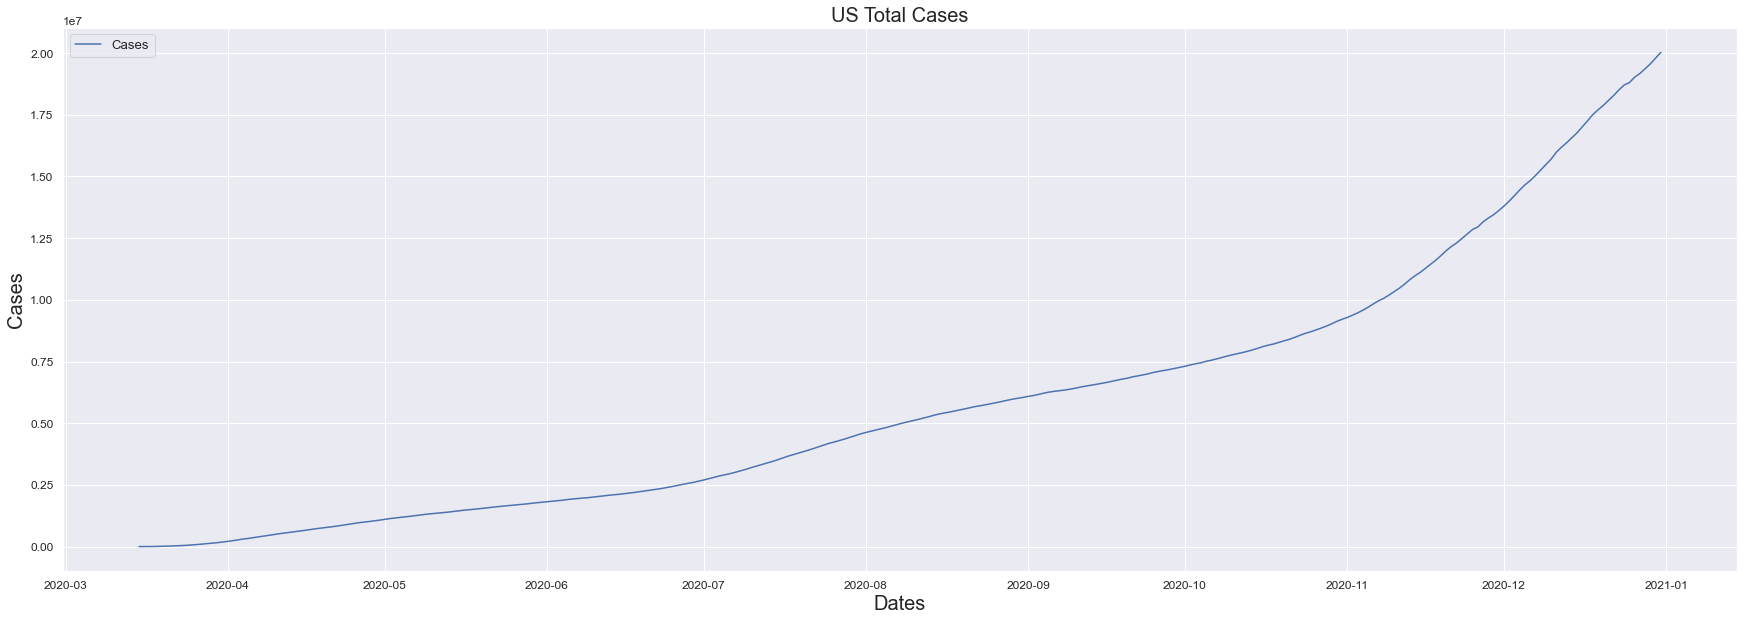

In [18]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=us_total_cases.index,y=us_total_cases.cases,data=us_total_cases, estimator=None)
plt.title("US Total Cases", fontsize=20)
plt.xlabel("Dates", fontsize=20)
plt.ylabel("Cases", fontsize=20)
plt.legend(['Cases'])
plt.show()

In [19]:
us_total_deaths = pd.DataFrame(us_total_deaths)

In [20]:
us_total_deaths

,deaths
date,
2020-03-15,68.00
2020-03-16,91.00
2020-03-17,117.00
2020-03-18,162.00
2020-03-19,212.00
...,...
2020-12-27,333253.00
2020-12-28,335152.00
2020-12-29,338780.00


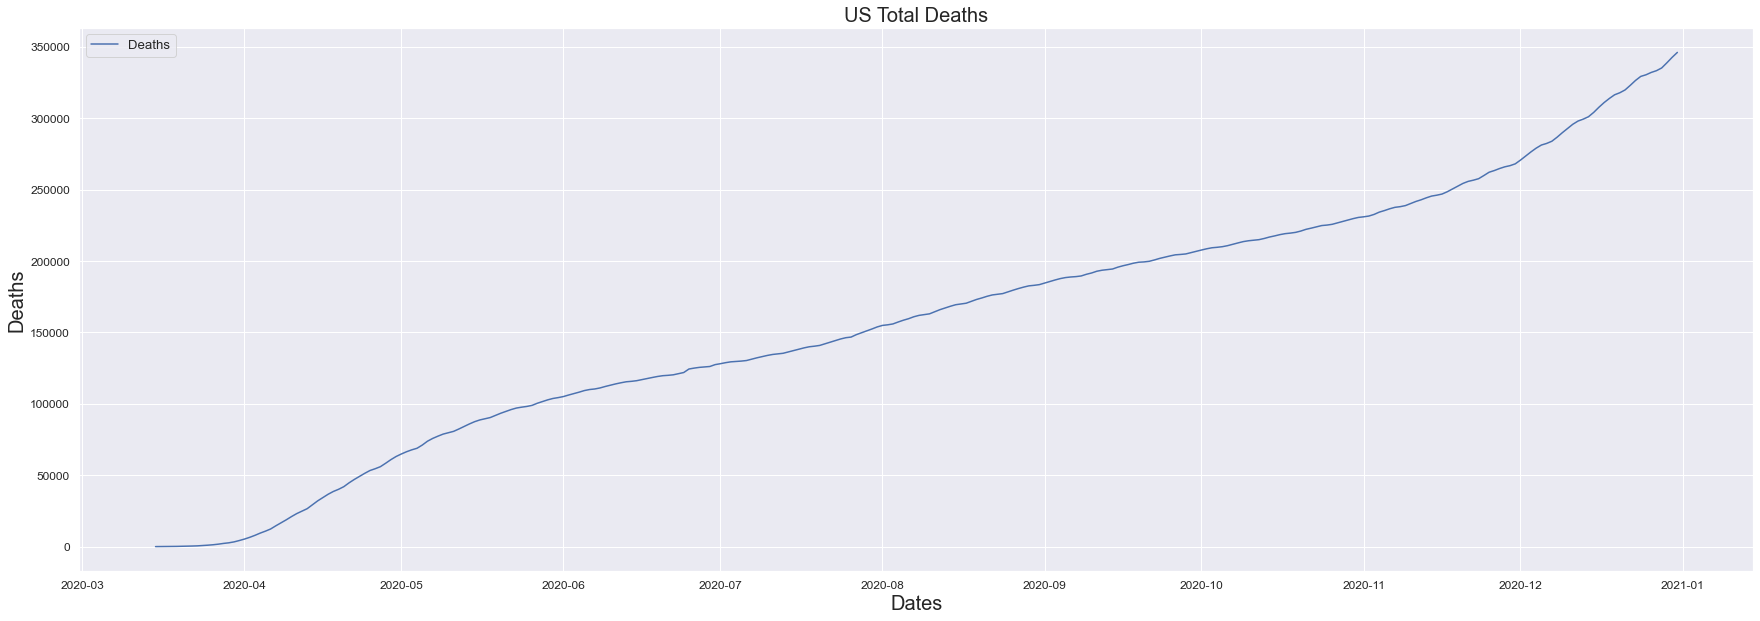

In [21]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=us_total_deaths.index,y=us_total_deaths.deaths,data=us_total_deaths, estimator=None)
plt.title("US Total Deaths", fontsize=20)
plt.xlabel("Dates", fontsize=20)
plt.ylabel("Deaths", fontsize=20)
plt.legend(['Deaths'])
plt.show()

### Question 3

While it is important to know the total deaths and cases throughout the COVID-19 pandemic, it is also important for local and state health officials to know the the number of new cases and deaths each day to understand how rapidly the virus is spreading. Using the table you created in Question 1, calculate the number of new deaths and cases each day and a seven-day average of new deaths and cases. Once you have organized your data, find the days that saw the largest number of new cases and deaths. Write a sentence or two after the code block communicating your results.

In [22]:
us_total_cases

,cases
date,
2020-03-15,3600
2020-03-16,4507
2020-03-17,5906
2020-03-18,8350
2020-03-19,12393
...,...
2020-12-27,19174788
2020-12-28,19363798
2020-12-29,19564828


In [23]:
us_total_cases["diff_cases"] = us_total_cases.diff()

In [24]:
us_total_cases

,cases,diff_cases
date,,
2020-03-15,3600,NaN
2020-03-16,4507,907.00
2020-03-17,5906,1399.00
2020-03-18,8350,2444.00
2020-03-19,12393,4043.00
...,...,...
2020-12-27,19174788,152089.00
2020-12-28,19363798,189010.00
2020-12-29,19564828,201030.00


In [25]:
us_total_cases.diff_cases.max()

280016.0

In [26]:
max_new_cases_date = us_total_cases[us_total_cases.diff_cases == 280016.0]

In [27]:
max_new_cases_date

,cases,diff_cases
date,,
2020-12-11,15977147,280016.00


In [28]:
us_total_deaths["diff_deaths"] = us_total_deaths.diff()

In [29]:
us_total_deaths

,deaths,diff_deaths
date,,
2020-03-15,68.00,NaN
2020-03-16,91.00,23.00
2020-03-17,117.00,26.00
2020-03-18,162.00,45.00
2020-03-19,212.00,50.00
...,...,...
2020-12-27,333253.00,1230.00
2020-12-28,335152.00,1899.00
2020-12-29,338780.00,3628.00


In [30]:
us_total_deaths.diff_deaths.max()

3808.0

In [31]:
max_new_deaths_date = us_total_deaths[us_total_deaths.diff_deaths == 3808.0]

In [32]:
max_new_deaths_date

,deaths,diff_deaths
date,,
2020-12-30,342588.00,3808.00


### Question 4

Create a new table, based on the table from Question 3, and calculate the number of new deaths and cases per 100,000 people each day and a seven day average of new deaths and cases per 100,000 people.

### Question 5. 

Create a visualization for the seven-day averages for new cases and deaths per 100,000 people in the United States.

#### Python code done by Dennis Lam